In [1]:
import glob
import json

log_dir = "../logs/"

all_logs = []
for log_file in glob.glob(log_dir + "*.json"):
    with open(log_file, "r") as f:
        log_file = log_file.split("_C")[1].split(".")[0]
        all_logs.append([log_file, json.load(f)])

In [2]:
def add_values(acc, entry):
    """
    Add values to an entry dict.
    """
    acc["chamfer"] += entry["chamfer"]
    acc["depth_loss"] += entry ["depth_loss"]
    acc["f_score"] += entry["f_score"]
    acc["iou"] += entry["iou"]
    acc["mask_loss"] += entry["mask_loss"]
    
def average_values(acc, num):
    """
    Average values in an entry dict.
    """
    acc["chamfer"] /= num
    acc["depth_loss"] /= num
    acc["f_score"] /= num
    acc["iou"] /= num
    acc["mask_loss"] /= num


all_avg_vals = {}
for log_file, log_list in all_logs:
    avg_vals = {
        "final": {
            "chamfer": 0,
            "depth_loss": 0,
            "f_score": 0,
            "iou": 0,
            "mask_loss": 0
        },
        "first_stage": {
            "chamfer": 0,
            "depth_loss": 0,
            "f_score": 0,
            "iou": 0,
            "mask_loss": 0
        },
        "initial": {
            "chamfer": 0,
            "depth_loss": 0,
            "f_score": 0,
            "iou": 0,
            "mask_loss": 0
        }
    }
    for _, log in log_list.items():
        add_values(avg_vals["final"], log["final"])
        add_values(avg_vals["first_stage"], log["first_stage"])
        add_values(avg_vals["initial"], log["initial"])

    average_values(avg_vals["final"], len(log_list))
    average_values(avg_vals["first_stage"], len(log_list))
    average_values(avg_vals["initial"], len(log_list))
    
    all_avg_vals["C" + log_file] = avg_vals


In [18]:

# Plot final, first_stage, initial for each C
# Use stacked bar chart
import matplotlib.pyplot as plt

def plot_stacked_bar_chart(data, title, field_name=None, yscale=True, key_filters=None):
    if field_name is None:
        field_name = title.lower()
    labels = sorted(list(data.keys()))
    if key_filters is not None:
        labels = [l for l in labels if l in key_filters]
    final = [data[k]["final"][field_name] for k in labels]
    first_stage = [data[k]["first_stage"][field_name] for k in labels]
    initial = [data[k]["initial"][field_name] for k in labels]

    x = range(len(labels))
    
    if "iou" in field_name:
        # Compute 1 - x
        final = [1 - x for x in final]
        first_stage = [1 - x for x in first_stage]
        initial = [1 - x for x in initial]
    plt.bar(x, initial, color='darkorange')
    plt.bar(x, first_stage, color='cornflowerblue')
    plt.bar(x, final, color='darkorchid')
    plt.xticks(x, labels)
    if yscale:
        plt.yscale("log")
    # Add legend
    plt.legend(["Initial", "First Stage", "Final Stage"])
    plt.title(title)
    plt.show()


In [19]:
sorted_avg_vals = {k: all_avg_vals[k] for k in sorted(all_avg_vals.keys())}

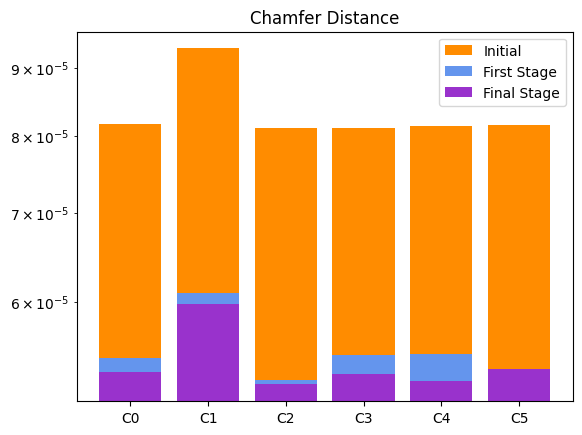

In [20]:
plot_stacked_bar_chart(all_avg_vals, "Chamfer Distance", "chamfer")

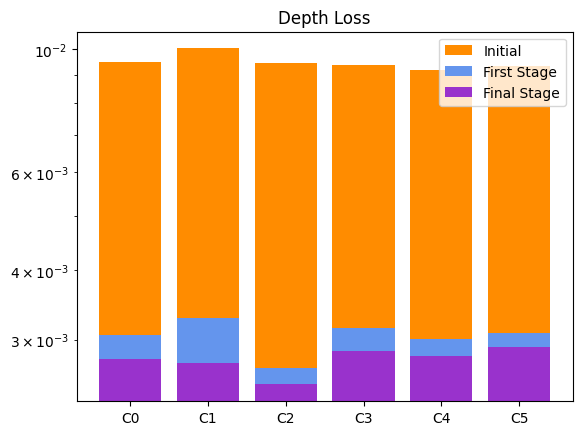

In [21]:
plot_stacked_bar_chart(all_avg_vals, "Depth Loss", "depth_loss")

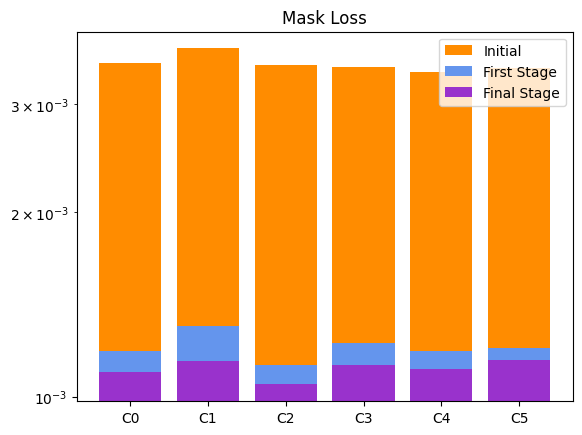

In [22]:
plot_stacked_bar_chart(all_avg_vals, "Mask Loss", "mask_loss")

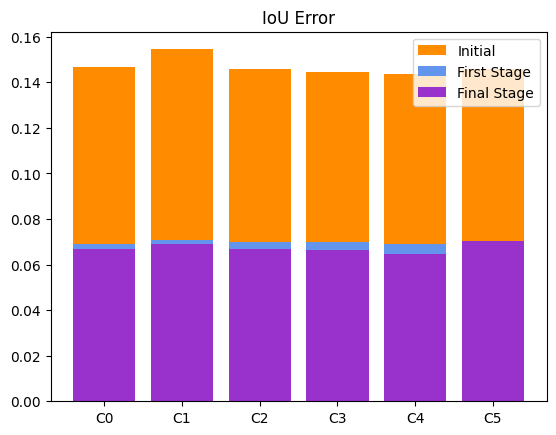

In [23]:
plot_stacked_bar_chart(all_avg_vals, "IoU Error", "iou", yscale=False)

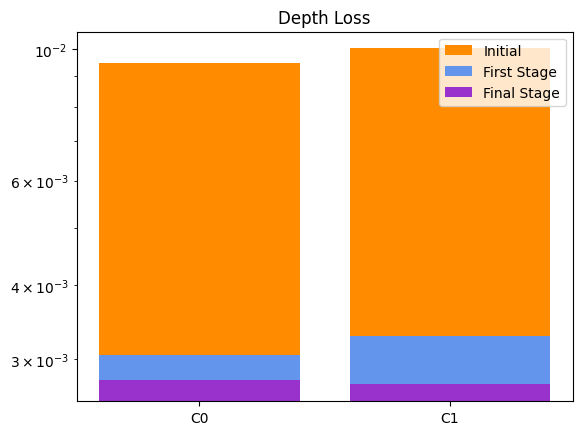

In [28]:
plot_stacked_bar_chart(all_avg_vals, "Depth Loss", "depth_loss", key_filters=["C0", "C1"])

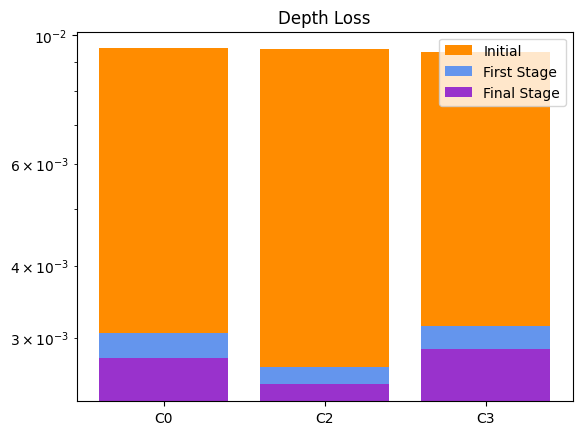

In [29]:
plot_stacked_bar_chart(all_avg_vals, "Depth Loss", "depth_loss", key_filters=["C2", "C0", "C3"])

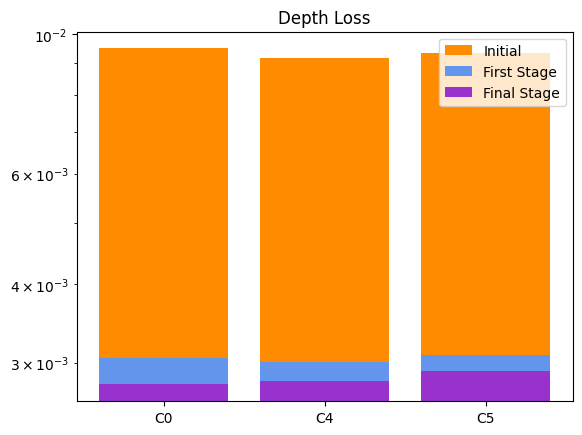

In [31]:
plot_stacked_bar_chart(all_avg_vals, "Depth Loss", "depth_loss", key_filters=["C4", "C0", "C5"])